## Aula 1 - Algebra linear

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.utils import resample
from scipy.stats import shapiro, mannwhitneyu

In [58]:
# escalar => número (tensor de ordem 0)
# vetor
# matriz

x = 2 # escalar
x2 = np.array([1,2,3]) # único vetor com 3 componentes (vetor linha) - vetor de escalares
x3 = np.array([[1],[2],[3]]) # matriz coluna com 3 vetores - vetor de vetores com escalares
x4 = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]) # matriz tradicional

print(x2)
print()
print(x3)
print()
print(x4)

[1 2 3]

[[1]
 [2]
 [3]]

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [59]:
lista = np.array([1, 2, 3, 4, 5])
df = pd.DataFrame({'coluna': lista, 'coluna 2': lista})
df

,coluna,coluna 2
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [60]:
type(df)

pandas.core.frame.DataFrame

In [61]:
type(df.coluna)

pandas.core.series.Series

In [62]:
lista[:1]

array([1])

In [63]:
x2 + x3

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [64]:
x3 + x4

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [65]:
x5 = np.array([[1], [2]])

In [66]:
# multiplicar
# arr1 (x,y) / arr2 (z,w) ---> arr3 (x,w)
# A.B != B.A

# np.dot(x4, x3) # diferente de soma, produto interno de matriz
x4@x3

array([[14],
       [14],
       [14]])

In [67]:
# Divisão
# A.B = Y --> equação fundamental da algebra linear


'''
Para os escalares, o zero na soma e na subtração é que chamamos de elemento neutro.
Porém, o 1 na multiplicação e na divisão é o elemento neutro.
'''
# x4/x3
x3/x4

array([[1.        , 0.5       , 0.33333333],
       [2.        , 1.        , 0.66666667],
       [3.        , 1.5       , 1.        ]])

In [68]:
zeros = np.zeros((3, 3))
ones = np.ones((3, 3))
print(zeros)
print()
print(ones)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


$$A = \begin{pmatrix}
a_{00} & a_{01} & a_{02} \\ a_{10} & a_{11} & a_{12} \\ a_{20} & a_{21} & a_{22}
\end{pmatrix}$$

In [69]:
id = np.eye(3)
id

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [70]:
x4 * 1

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

$$x \cdot x^{-1} = 1$$
---
matriz inversa
$$A \cdot A^{-1} = 1$$
---
Eq. fundamental da álgebra

$$A . X = Y$$
$$A . A^{-1} . X = A^{-1} . Y$$
$$X = AA^{-1} . X.Y$$
$$X - (A^{T}A)^{-1}A^{T}Y$$


Text(0.5, 1.0, 'Interpolação de reta sobre todos os pontos')

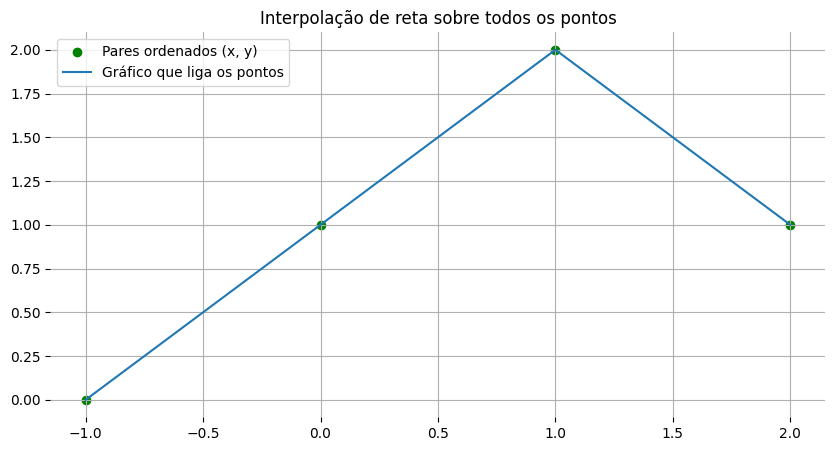

In [71]:
x1, y1 = -1, 0
x2, y2 = 0, 1
x3, y3 = 1, 2
x4, y4 = 2, 1

x = [x1, x2, x3, x4]
y = [y1, y2, y3, y4]

plt.figure(figsize = (10, 5))
plt.scatter(x1, y1, color = 'green', label = 'Pares ordenados (x, y)')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')
plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação de reta sobre todos os pontos')

In [72]:
# y = mx + n
# 0 = -1*m + 1*n
# 1 = 0*m + 1*n

A = np.array([[-1, 1], [0, 1], [1, 1], [2, 1]])
y = np.array([[y1], [y2], [y3], [y4]])

In [73]:
A

array([[-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 2,  1]])

In [74]:
y

array([[0],
       [1],
       [2],
       [1]])

In [75]:
(m, n) = np.dot(np.dot(np.linalg.pinv(np.dot(A.T, A)), A.T), y)
print(m, n)

[0.4] [0.8]


Text(0.5, 1.0, 'Interpolação de reta sobre todos os pontos')

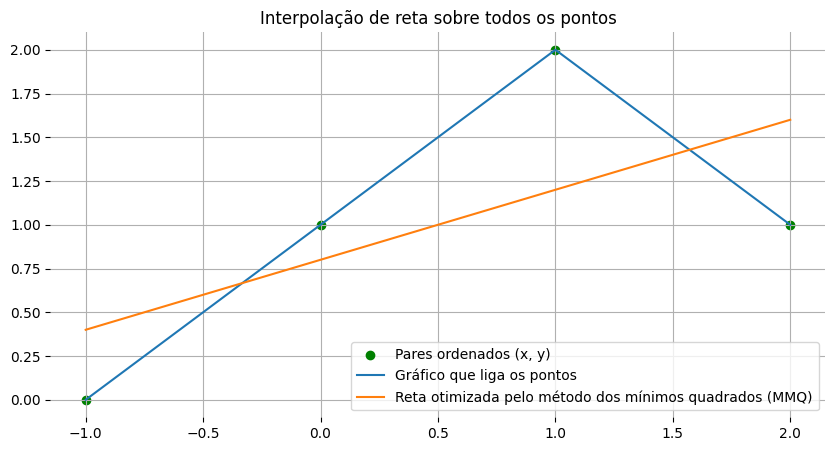

In [76]:
plt.figure(figsize = (10, 5))
plt.scatter(x1, y1, color = 'green', label = 'Pares ordenados (x, y)')
plt.scatter(x2, y2, color = 'green')
plt.scatter(x3, y3, color = 'green')
plt.scatter(x4, y4, color = 'green')
v_x = np.linspace(-1, 2)
plt.plot(x, y, label = 'Gráfico que liga os pontos')
plt.plot(v_x, m * v_x + n, label = 'Reta otimizada pelo método dos mínimos quadrados (MMQ)')
plt.grid(True)
plt.box(False)
plt.legend()
plt.title('Interpolação de reta sobre todos os pontos')

## Aula 2 - Estatística

In [77]:
# Variável categórica (dados rotulados)
# Variável discreta (números inteiros)
# Variável continua (números reais)

In [78]:
# Medidas de tendência central
# Média
# Mediana
# Moda

In [79]:
# Formas de distribuição
# Distribuição normal (sino) --> Gaussiana
# Distribuição assimétrica a direita
# Distribuição assimétrica a esquerda
# Distribuição bimodal

In [80]:
# Medidas de variabilidade
# Amplitude
# Desvio padrão --> raiz quadrada da variância
# Variância --> sigma ao quadrado --> somatório de xi - média elevado ao quadrado dividido pelo número de variáveis
# Quartis

## Aula 2 - Bibliotecas

In [ ]:
df_excel = pd.read_excel('../..Data/Fase 2/Chess.xlsx', sheet_name='Chess')
df_csv = pd.read_csv('../..Data/Fase 2/Tomato.csv', sep=',')

In [ ]:
df_excel.head()

In [ ]:
df_csv.head(2)

In [ ]:
df_csv.tail()

In [ ]:
df_csv.shape

In [ ]:
df_excel.info()

In [ ]:
df_csv.describe()

In [ ]:
set(df_excel["victory_status"]) # traz todas as categorias nessa coluna

In [ ]:
def categorizar_tomate_media(media):
    if media >= 40 and media <= 70:
        return "tomate medio"
    elif media >= 40:
        return "tomate pequeno"
    else:
        return "tomate grande"

In [ ]:
df_csv["categoria_tomate"] = df_csv["Average"].apply(categorizar_tomate_media)

In [ ]:
df_csv.head(2)

In [ ]:
df_csv.groupby(["categoria_tomate"]).describe()

In [ ]:
filtro = df_csv["Average"] < 40
filtro

In [ ]:
arr_list = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
print(arr_list)

In [ ]:
arr_zeros = np.zeros((4, 6))
print(arr_list)

In [ ]:
arr_ones = np.ones((3, 4))
print(arr_ones)

In [ ]:
arr_random = np.random.rand(3, 4)
print(arr_random)

In [ ]:
print(arr_random.shape)

In [ ]:
arr_random_reshape = arr_random.reshape((4, 3))
print(arr_random_reshape)

In [ ]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr3 = np.array([[9, 10], [11, 12]])
arr1

In [ ]:
arr4 = np.concatenate((arr1, arr2, arr3), axis=1)
arr4

In [ ]:
arr4_split = np.split(arr4, 2)
print(arr4_split)

In [ ]:
arr_transposto = np.transpose(arr4)
print(arr_transposto)

In [ ]:
arr_revertido = arr_transposto.T
arr_revertido

In [ ]:
arr_a = np.array([1, 7, 27])
arr_b = np.array([1, 5, 1])

In [ ]:
arr_a_b = np.add(arr_a, arr_b)
arr_a_b

In [ ]:
arr_sub_a_b = np.subtract(arr_a, arr_b)
arr_sub_a_b

In [ ]:
df_csv.info()

In [ ]:
df_csv["Date"] = pd.to_datetime(df_csv["Date"])

In [ ]:
df_csv.info()

In [ ]:
plt.plot(df_csv["Date"], df_csv["Average"])
plt.xlabel("Data")
plt.ylabel("Média e em kg de tomates")
plt.title("Média de tomates ao longo do tempo")
plt.show()

In [ ]:
df_excel.head()

In [ ]:
plt.scatter(df_excel["black_rating"], df_excel["white_rating"])
plt.xlabel("Black")
plt.ylabel("White")
plt.title("Partidas e peças pretas x peças brancas")
plt.show()

In [ ]:
plt.bar(df_csv["categoria_tomate"], df_csv["Avarege"])
plt.xlabel("Categoria de tomates")
plt.ylabel("Média")
plt.title("Média de tomates por categoria")
plt.show()

In [ ]:
df_excel.groupby(["victory_status"]).mean().plot(kind="pie", y="turns", autopct="%1.0f")
plt.title("Média de partida dentro deo statos de vitoria")

In [ ]:
df_diabetes = pd.read_csv('../../Data/Fase 2/diabetes.csv', sep=',')
df_diabetes.head()

In [ ]:
x = df_diabetes.drop(["Class variable"], axis=1)
x.head()

In [ ]:
y = df_diabetes["Class variable"]
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
len(x_train)

In [ ]:
len(x_test)

In [ ]:
df_diabetes.shape

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

In [ ]:
accuracy = knn.score(x_test, y_test)
accuracy

## Aula 3 - (EDA)

In [ ]:
df = pd.read_csv('../../Data/Fase 2/data_spotify.csv')

In [ ]:
df.head()

In [ ]:
df["duracao_em_min"] = df["duration_ms"] / 60000

In [ ]:
df.describe()

In [ ]:
df.groupby("album")["duracao_em_min"].mean()

In [ ]:
df = pd.read_excel('../../Data/Fase 2/dataset_rolling_stones.xlsx')
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
print("Data Inicial: ", df["release_date"].min())

In [ ]:
print("Data Final: ", df["release_date"].max())

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated()]

In [ ]:
df_maior_duracao_musica = df.groupby("album")\
    ["duracao_em_min"].mean().sort_values(ascending=False)

In [ ]:
df_maior_duracao_musica

In [ ]:
df_maior_duracao_musica.head(5).plot(kind="bar")
plt.xlabel("Álbuns")
plt.ylabel("Média de duração das musicas")
plt.title("Top 5 álbuns com maior duração de musicas")
plt.show()

In [ ]:
top_albums = df["album"].value_counts().head(10)
plt.barh(top_albums.index, top_albums.values)
plt.title("Top 10 0 Álbuns com mais musicas")
plt.show()

In [ ]:
df_ultima_decada = df[df["release_date"].between(pd.to_datetime("2011"), pd.to_datetime("2020"))]

In [ ]:
df_por_album = df_ultima_decada.groupby("album")\
    ["popularity"].sum().sort_values(ascending=False).head(10)

In [ ]:
total_popularidade = df_por_album.sum()
df_porcentagem = df_por_album / total_popularidade * 100
labels = df_porcentagem.index.tolist()
sizes = df_porcentagem.values.tolist()

figura, grafico = plt.subplots(figsize=(18, 6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title("porcentagem de popularidade da álbuns na ultima década (top 10 álbuns)")
plt.legend(labels, loc='best')
plt.show()

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x="duracao_em_min", data=df)
axes.set_title("Boxplot")
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.violinplot(x="duracao_em_min", data=df, color="gray")
axes.set_title("Gráfico de Violino")
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(8, 6))
sns.violinplot(x="duracao_em_min", data=df, ax=axes, color="lightgray")
sns.boxplot(x="duracao_em_min", data=df, ax=axes, whis=1.5, color="darkblue")
axes.set_title("Gráfico de Violino e Boxplot")
plt.show()

In [ ]:
df.head()

In [ ]:
def classifica_musica_ao_vivo(df):
    if df["liveness"] >= 0.8:
        return True
    else:
        return False

In [ ]:
df["ao_vivo"] = df.apply(classifica_musica_ao_vivo, axis=1)

In [ ]:
df.head()

In [ ]:
df.groupby("ao_vivo")["ao_vivo"].count()

In [ ]:
df_gravado_em_studio = df[df["ao_vivo"] == False]
df_show_ao_vivo = df[df["ao_vivo"] == True]

In [ ]:
print("Média das musicas ao vivo: ", df_show_ao_vivo["duracao_em_min"].mean())
print("Média das musicas em studio: ", df_gravado_em_studio["duracao_em_min"].mean())

In [ ]:
df_studio = df_gravado_em_studio.groupby("album")["loudness"].sum()
df_ao_vivo = df_show_ao_vivo.groupby("album")["loudness"].sum()

fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title("Soma do barulho dos álbuns de studio")
axes[0].set_xlabel("Barulho")
axes[0].set_ylabel("Frequência")

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title("Soma do barulho dos álbuns ao vivo")
axes[1].set_xlabel("Barulho")
axes[1].set_ylabel("Frequência")

fig.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_studio, label="Albuns de studio", fill=True)
sns.kdeplot(data=df_ao_vivo, label="Albuns ao vivo", fill=True)
plt.title("Distribuição do barulho dos álbuns")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend

In [ ]:
# teste da significância estatística (testes paramétricos)

stat, p = shapiro(df_studio)
print("Soma do barulho dos albuns de studio: ")
print("Estatistica de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
    print("Nao ha evidencia suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")

stat, p = shapiro(df_ao_vivo)
print("Soma do barulho dos albuns ao vivo: ")
print("Estatistica de teste: {:.4f}, valor p: {}".format(stat, p))

if p > 0.05:
    print("Nao ha evidencia suficiente para rejeitar a hipótese de normalidade")
else:
    print("A hipótese de normalidade é rejeitada")

In [ ]:
# teste de distribuições parecidas (testes não paramétricos)

stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative="less")
print("Estatística de teste U: ", stat)
print("Valor p: ", p)
alpha = 0.05

if p < alpha:
    print("Diferença estatisticamente significante")
else:
    print("Não há diferença estatisticamente significante")

In [ ]:
# Correlação

media_por_album = df.groupby("album")["valence"].mean().reset_index()
media_por_album = media_por_album.rename(columns={"valence": "media_valence"})
media_por_album["sentimento"] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album["media_valence"]]
media_por_album.groupby("sentimento")["sentimento"].count()

In [ ]:
df_resultado_final = pd.merge(df, media_por_album, on="album")
df_resultado_final.head(3)

In [ ]:
matriz_correlacao = df_resultado_final.corr()
correlacao_sentimento = matriz_correlacao["media_valence"]
display(correlacao_sentimento)

In [ ]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
sns.scatterplot(x="media_valence", y="danceability", hue="sentimento", data=df_resultado_final, palette="coolwarm")
plt.xlabel("media valence")
plt.ylabel("danceability")
plt.title("Relação entre a valência media e a capacidade de dança das musicas")
plt.show()

In [ ]:
sns.scatterplot(x="media_valence", y="liveness", hue="sentimento", data=df_resultado_final, palette="coolwarm")
plt.xlabel("media valence")
plt.ylabel("liveness")
plt.title("Relação entre a valência media e músicas ao vivo")
plt.show()

## Aula 4 - Feature engineering

In [ ]:
dados = pd.read_csv('../../Data/Fase 2/data.csv', sep=',')

In [ ]:
dados.head()

In [ ]:
correlation_matrix = dados.corr().round(2)
fig, ax = plt.subplots(figsize=(8, 8 ))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
x = dados[["sqtf_living", "bathrooms"]].values
y = dados["price"]

In [ ]:
sns.scatterplot(dados=dados, x="sqtf_living",y="price")

In [ ]:
sns.scatterplot(dados=dados, x="bathrooms",y="price")

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(x[:,0], y)
ax.scatter(x[:,1], y)

In [ ]:
sns.histplot(data=dados, x="sqtf_living", kde=True)

In [ ]:
sns.histplot(data=dados, x="bathrooms", kde=True)

In [ ]:
hist_variaveis = pd.DataFrame(dados, columns=["sqtf_living", "bathrooms"])
hist_variaveis.sqtf_living.hist()
hist_variaveis.bathrooms.hist()

In [ ]:
# Padronização
scalar = StandardScaler()
x_std = scalar.fit_transform(x)
x_std = pd.DataFrame(x_std, columns=["sqtf_living", "bathrooms"])
x_std.sqtf_living.hist()
x_std.bathrooms.hist()

In [ ]:
x_train, y_test, x_test, y_test = train_test_split(dados[["sqtf_living", "bathrooms"]].values, dados["price"].values, random_state=7)

In [ ]:
x_train

In [ ]:
scalar = MinMaxScaler()
scalar.fit(x_train)

In [ ]:
x_train_scaled = scalar.transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [ ]:
x_train_scaled

In [ ]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE: ", MAE)
print("R2: ", r2)

In [ ]:
model_normal = LinearRegression()
model_normal.fit(x_train, y_train)

In [ ]:
y_pred_normal = model_normal.predict(x_test)


In [ ]:
MAE = mean_absolute_error(y_test, y_pred_normal)
r2 = r2_score(y_test, y_pred_normal)
print("MAE: ", MAE)
print("R2: ", r2)

## Aula 5 - Avaliação de modelo de regressão

In [ ]:
imoveis = pd.read_csv('../../../Data/Fase 2/Valorizacao_Ambiental.csv', sep=';')

In [ ]:
imoveis.head()

In [ ]:
imoveis.shape

In [ ]:
imoveis.isnull().sum()

In [ ]:
imoveis.describe().round(2)

In [ ]:
# Identificar a variável target

plt.hist(imoveis["Valor"], bins=5)
plt.xlabel("Frequência")
plt.ylabel("Valor")
plt.title("Histograma da variável valor")

In [ ]:
imoveis["raiz_valor"] = np.sqrt(imoveis["Valor"])

In [ ]:
plt.hist(imoveis["raiz_valor"], bins=5)
plt.xlabel("Frequência")
plt.ylabel("Valor")
plt.title("Histograma da variável valor após raiz quadrada aplicada")

In [ ]:
plt.figure(figsize=(24, 20))
plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column="Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")
plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column="Area")
fig.set_title("")
fig.set_ylabel("Area em M2")
plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column="IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")
plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column="Andar")
fig.set_title("")
fig.set_ylabel("Andar")
plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column="DistBM")
fig.set_title("")
fig.set_ylabel("Distancia do mar")
plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column="Suites")
fig.set_title("")
fig.set_ylabel("Qtd de suites")

In [ ]:
# correlação padrão de Pearson

correlation_matrix = imoveis.corr().round(2)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [ ]:
plt.scatter("Area", "Valor", data=imoveis)
plt.xlabel("Arra em M2")
plt.ylabel("Valor")
plt.title("Area do imóvel x valor")

In [ ]:
plt.scatter("IA", "Valor", data=imoveis)
plt.xlabel("Idade aparente")
plt.ylabel("Valor")
plt.title("Idade do imóvel x valor")

In [ ]:
sns.parplot(imoveis)

In [ ]:
sns.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls')

In [ ]:
sns.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

In [ ]:
sns.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')

In [ ]:
lr = LinearRegression()
X = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBm']]
y = imoveis['Valor']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Intercepto: ', lr.intercept_)

In [ ]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')
plt.show()

In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE", MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos error
print("MSE", MSE) # Mean Squared Error (MSE) é a média dos erros quadráticos
print("r2", r2) # (R-quadrado)

In [ ]:
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(X_train, y_train)

In [ ]:
y_pred_model_dtr = model_dtr.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print("MAE", MAE)
print("MSE", MSE)
print("r2", r2)

In [ ]:
svr = SVR(kernel='linear')

In [ ]:
svr.fit(X_train, y_train)

In [ ]:
y_pred_svr = svr.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print("MAE", MAE)
print("MSE", MSE)
print("r2", r2)

## Aula 6 - Limitações e os modelos de classificação

In [ ]:
df = pd.read_csv('../../../Data/Fase 2/airlines.csv', sep=',')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna()

In [ ]:
duplicated_cols = []
for col in df.columns:
    if df[col].duplicated().any():
        duplicated_cols.append(col)
print(duplicated_cols)

In [ ]:
df.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='Length', data=df, ax=ax, color='lighgray')
sns.boxplot(x='Length', data=df, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Box Plot e Violin Plot')
plt.show()

In [ ]:
sns.violinplot(x='Class', y='Length', data=df)
plt.show()

In [ ]:
atraso_voo = df.groupby('Class')
atraso_voo.describe()

In [ ]:
sns.violinplot(x='Class', y='Time', data=df)
plt.show()

In [ ]:
sns.countplot(x='Airline', hue='Class', data=df)

In [ ]:
diaSemana = list(range(1, 8))
sns.countplot(x='DayOfWeek', data=df, order=diaSemana)

In [ ]:
sns.countplot(x='Class', data=df)

In [ ]:
df['AirportFrom'] = LabelEncoder().fit_transform(df['AirportFrom'])
df['AirportTo'] = LabelEncoder().fit_transform(df['AirportTo'])
df['Airline'] = LabelEncoder().fit_transform(df['Airline'])
df.head(3)

In [ ]:
x = df[['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
y = df['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [ ]:
# Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)

In [ ]:
y_pred_gnb = gnb.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_gnb)
print('Accuracy: ', round(accuracy, 2))

In [ ]:
df_majority = df[df.Class == 0]
df_minority = df[df.Class == 2]

In [ ]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=7)

In [ ]:
df_equilibrado = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
sns.countplot(x='Class', data=df_equilibrado)

In [ ]:
x_equilibrado = df_equilibrado['Flight', 'Time', 'Length', 'DayOfWeek']
y_equilibrado = df_equilibrado['Class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, stratify=y_equilibrado, random_state=7)

In [ ]:
gnb_equilibrado = GaussianNB()
gnb_equilibrado.fit(x_train, y_train)

In [ ]:
y_pred_gnb_equilibrado = gnb_equilibrado.predict(x_test)

In [ ]:
accuracy_equilibrado = accuracy_score(y_test, y_pred_gnb_equilibrado)
print('Accuracy: ', round(accuracy_equilibrado, 2))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_equilibrado, y_equilibrado, test_size=0.3, random_state=7)

In [ ]:
rf = RandomForestClassifier(random_state=7)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [ ]:
accuracy_equilibrado_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy: ', round(accuracy_equilibrado_rf, 2))